In [295]:
import pandas as pd
import numpy as np

In [297]:
neighborhood_data = pd.read_csv('NeighborhoodData_finalData_2.csv')

In [299]:
neighborhood_data.columns

Index(['Unnamed: 0', 'OBJECTID_x', 'NGBRHD2', 'medhhinc', 'unemp', 'famfpl185',
       'chldfpl185', 'chld_3_4_preschl', 'ed_lt_hs', 'ed_hsgrad',
       'ed_partcoll', 'ed_collgrad', 'ed_hs', 'OBJECTID_y', 'life',
       'cancer_mort', 'heart_mort', 'alzeihmers_mort', 'stroke_mort',
       'respiratory_mort', 'injury_mort', 'diabetes_mort', 'hyper_mort',
       'flu_pneum_mort', 'birth', 'birth_lw', 'birth_pt', 'preg_overobese',
       'preg_prenatal', 'birth_teen', 'smoker', 'obese_adult',
       'overobese_teen', 'overobese_child', 'Health_outcome'],
      dtype='object')

In [301]:
neighborhood_data.head(5)

,Unnamed: 0,OBJECTID_x,NGBRHD2,medhhinc,unemp,famfpl185,chldfpl185,chld_3_4_preschl,ed_lt_hs,ed_hsgrad,...,birth_lw,birth_pt,preg_overobese,preg_prenatal,birth_teen,smoker,obese_adult,overobese_teen,overobese_child,Health_outcome
0,101,105.842092,Unincorporated - East,89355.282067,9.008178,14.148100,27.269987,64.888878,10.919137,28.044747,...,11.946445,14.999973,73.544114,61.989358,7.639569,14.355583,21.742644,31.987427,12.320697,Healthy
1,51,54.735213,Evergreen North,99101.799280,9.956280,16.894120,27.901847,38.954307,19.922021,18.821067,...,8.985730,11.010661,37.327656,69.902231,16.056096,9.982497,18.899581,32.053061,12.567875,Healthy
2,92,96.867538,East Murphy,92100.585154,12.023681,15.146576,27.168528,65.087269,12.258173,17.010171,...,6.975214,9.976915,37.968106,73.989171,33.550358,14.514838,18.282580,23.883221,12.483666,Healthy
3,14,18.820246,Milpitas - Southeastern,102282.084785,9.987967,14.871899,22.046756,65.182810,17.416557,18.090784,...,7.042725,10.012586,33.100798,70.019891,17.985338,9.009768,17.937976,19.553366,12.488325,Healthy
4,71,75.814638,Spartan Keys / Monterey Corridor,42945.209292,13.951179,41.852024,49.600347,64.997215,31.302806,27.130435,...,6.968559,10.009345,44.985579,71.048696,34.746337,12.917830,22.873951,19.651435,17.967334,Healthy


In [303]:
neighborhood_data.Health_outcome.unique()

array(['Healthy', 'At Risk', 'Chronic'], dtype=object)

In [305]:
neighborhood_data.drop(['Unnamed: 0','NGBRHD2'],axis=1,inplace=True)

In [307]:
neighborhood_data.head(5)

,OBJECTID_x,medhhinc,unemp,famfpl185,chldfpl185,chld_3_4_preschl,ed_lt_hs,ed_hsgrad,ed_partcoll,ed_collgrad,...,birth_lw,birth_pt,preg_overobese,preg_prenatal,birth_teen,smoker,obese_adult,overobese_teen,overobese_child,Health_outcome
0,105.842092,89355.282067,9.008178,14.148100,27.269987,64.888878,10.919137,28.044747,40.938999,19.029785,...,11.946445,14.999973,73.544114,61.989358,7.639569,14.355583,21.742644,31.987427,12.320697,Healthy
1,54.735213,99101.799280,9.956280,16.894120,27.901847,38.954307,19.922021,18.821067,31.129281,31.698589,...,8.985730,11.010661,37.327656,69.902231,16.056096,9.982497,18.899581,32.053061,12.567875,Healthy
2,96.867538,92100.585154,12.023681,15.146576,27.168528,65.087269,12.258173,17.010171,22.078790,50.129931,...,6.975214,9.976915,37.968106,73.989171,33.550358,14.514838,18.282580,23.883221,12.483666,Healthy
3,18.820246,102282.084785,9.987967,14.871899,22.046756,65.182810,17.416557,18.090784,25.999476,38.973616,...,7.042725,10.012586,33.100798,70.019891,17.985338,9.009768,17.937976,19.553366,12.488325,Healthy
4,75.814638,42945.209292,13.951179,41.852024,49.600347,64.997215,31.302806,27.130435,26.744713,14.434720,...,6.968559,10.009345,44.985579,71.048696,34.746337,12.917830,22.873951,19.651435,17.967334,Healthy


In [309]:
import matplotlib.pyplot as plt
import seaborn as sns

In [311]:
# Basic statistics for initial data understanding
eda_summary = neighborhood_data.describe()
eda_summary

,OBJECTID_x,medhhinc,unemp,famfpl185,chldfpl185,chld_3_4_preschl,ed_lt_hs,ed_hsgrad,ed_partcoll,ed_collgrad,...,birth,birth_lw,birth_pt,preg_overobese,preg_prenatal,birth_teen,smoker,obese_adult,overobese_teen,overobese_child
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,57.150423,99768.896569,9.072879,18.959762,31.355923,64.226982,15.990455,16.653710,24.310065,44.806638,...,13.379868,6.848726,9.175463,38.547000,74.348667,19.934942,10.662812,18.841158,20.184136,10.551929
std,30.896008,41880.143735,2.798172,11.741045,13.965889,7.429074,11.619543,6.628410,6.796550,21.949136,...,4.165064,1.376605,1.502693,11.971854,5.358751,15.910394,2.870656,6.259373,9.113666,5.312413
min,1.000000,33994.000000,3.821135,3.798341,7.615101,31.080893,2.888959,3.000000,9.000000,10.000000,...,3.300000,2.959024,5.924682,12.000000,61.784328,0.000000,4.000000,7.660578,5.068187,2.754488
25%,30.578431,76269.550377,7.020544,12.000000,22.290782,64.893512,8.000000,11.499369,20.637257,25.837128,...,12.003008,6.000000,8.031497,30.954662,70.000000,7.135133,9.002553,15.500000,14.000000,6.944960
50%,59.580735,95343.019042,9.017921,14.000000,27.500000,65.000000,11.000000,16.499961,24.967296,44.503691,...,13.442277,6.989540,9.000000,38.045866,74.000000,16.772584,10.548582,18.180246,19.510807,9.028935
75%,83.068747,115636.757179,10.982177,24.897032,41.174661,65.119093,21.291434,21.104090,28.147824,62.623232,...,16.144653,7.957973,10.000000,47.662670,78.213385,31.097494,12.031195,24.000000,31.797764,13.967301
max,109.000000,267489.392231,16.895818,61.221390,84.000000,95.000000,48.088343,31.211396,41.128979,94.000000,...,24.700000,12.032985,15.034621,74.089327,88.066327,60.500210,16.000000,28.035852,32.378800,18.296565


In [313]:
# Check for missing values
missing_values = neighborhood_data.isnull().sum()
missing_values

OBJECTID_x          0
medhhinc            0
unemp               0
famfpl185           0
chldfpl185          0
chld_3_4_preschl    0
ed_lt_hs            0
ed_hsgrad           0
ed_partcoll         0
ed_collgrad         0
ed_hs               0
OBJECTID_y          0
life                0
cancer_mort         0
heart_mort          0
alzeihmers_mort     0
stroke_mort         0
respiratory_mort    0
injury_mort         0
diabetes_mort       0
hyper_mort          0
flu_pneum_mort      0
birth               0
birth_lw            0
birth_pt            0
preg_overobese      0
preg_prenatal       0
birth_teen          0
smoker              0
obese_adult         0
overobese_teen      0
overobese_child     0
Health_outcome      0
dtype: int64

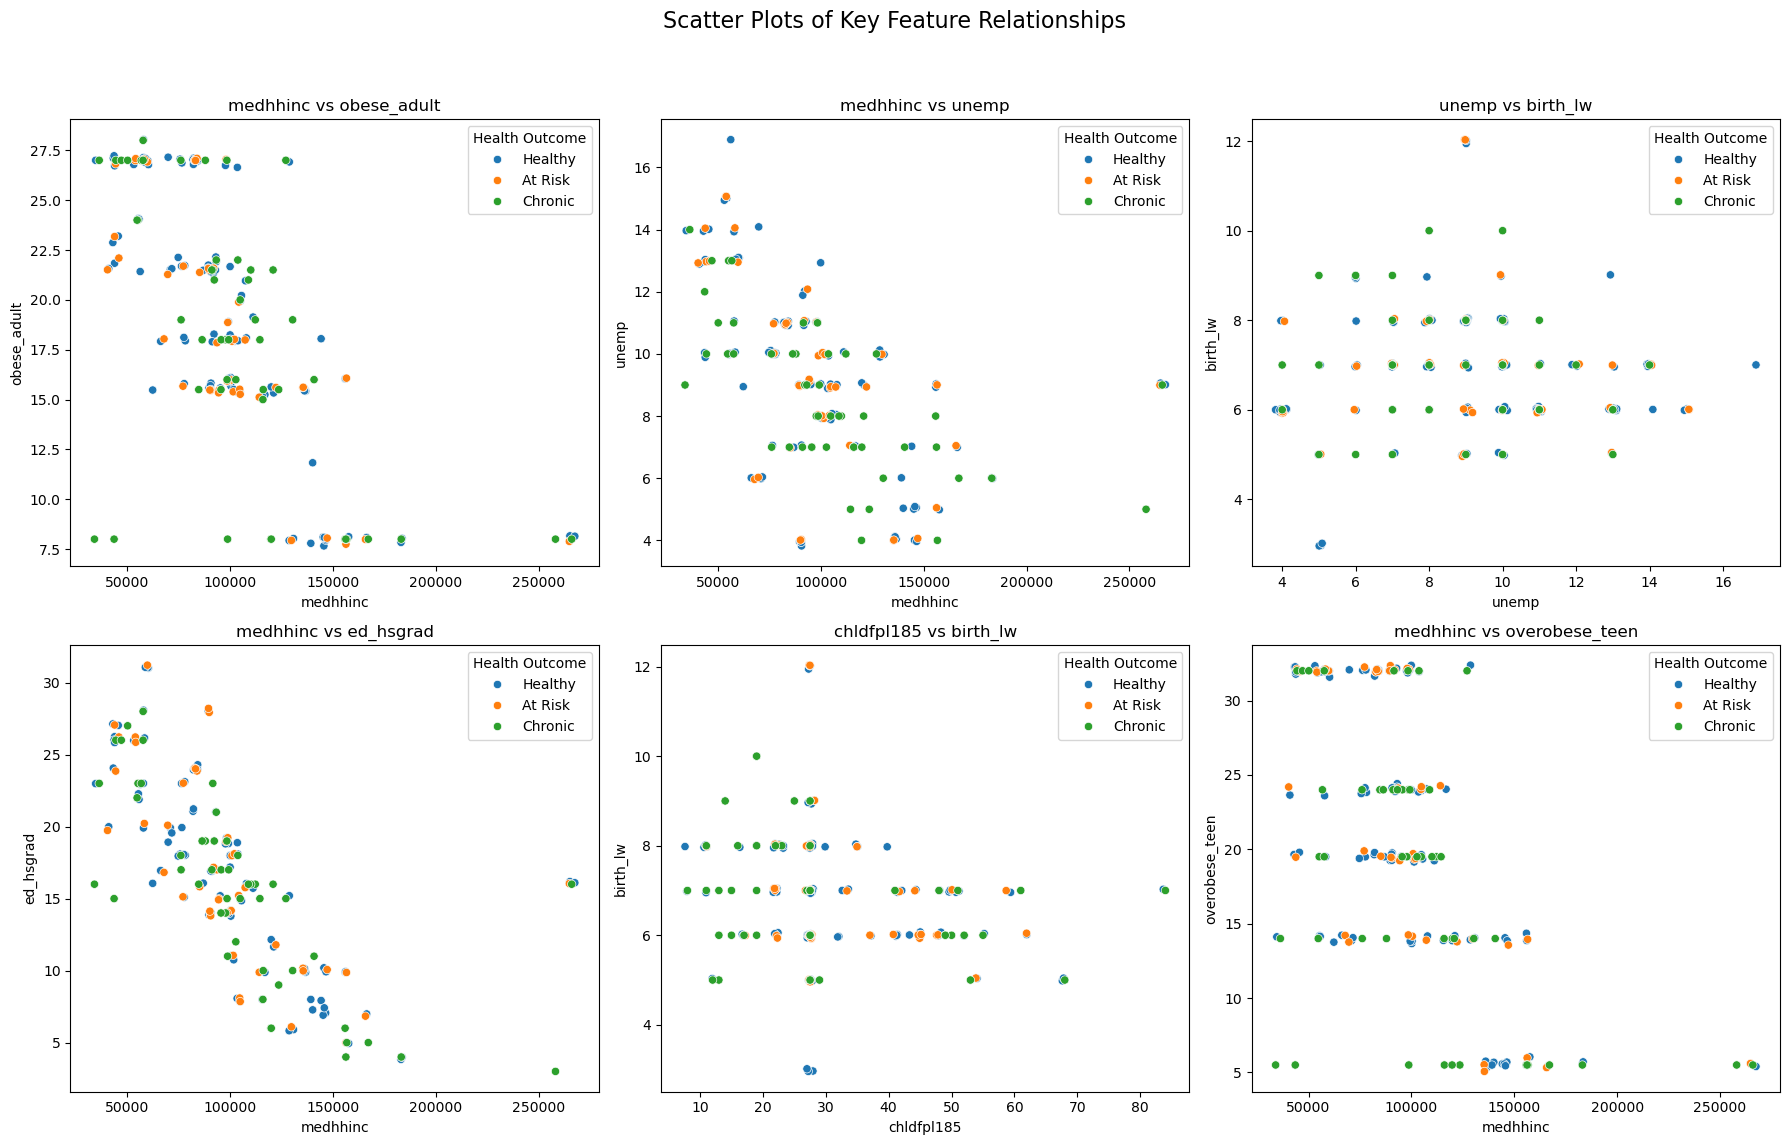

In [315]:
# Scatter Plots in 2x3 layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Scatter Plots of Key Feature Relationships", fontsize=16)

scatter_features = [('medhhinc', 'obese_adult'), ('medhhinc', 'unemp'), ('unemp', 'birth_lw'),
                    ('medhhinc', 'ed_hsgrad'), ('chldfpl185', 'birth_lw'), ('medhhinc', 'overobese_teen')]
for i, (x, y) in enumerate(scatter_features):
    row, col = divmod(i, 3)
    sns.scatterplot(data=neighborhood_data, x=x, y=y, hue='Health_outcome', ax=axes[row, col])
    axes[row, col].set_title(f"{x} vs {y}")
    axes[row, col].set_xlabel(x)
    axes[row, col].set_ylabel(y)
    axes[row, col].legend(title='Health Outcome', loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

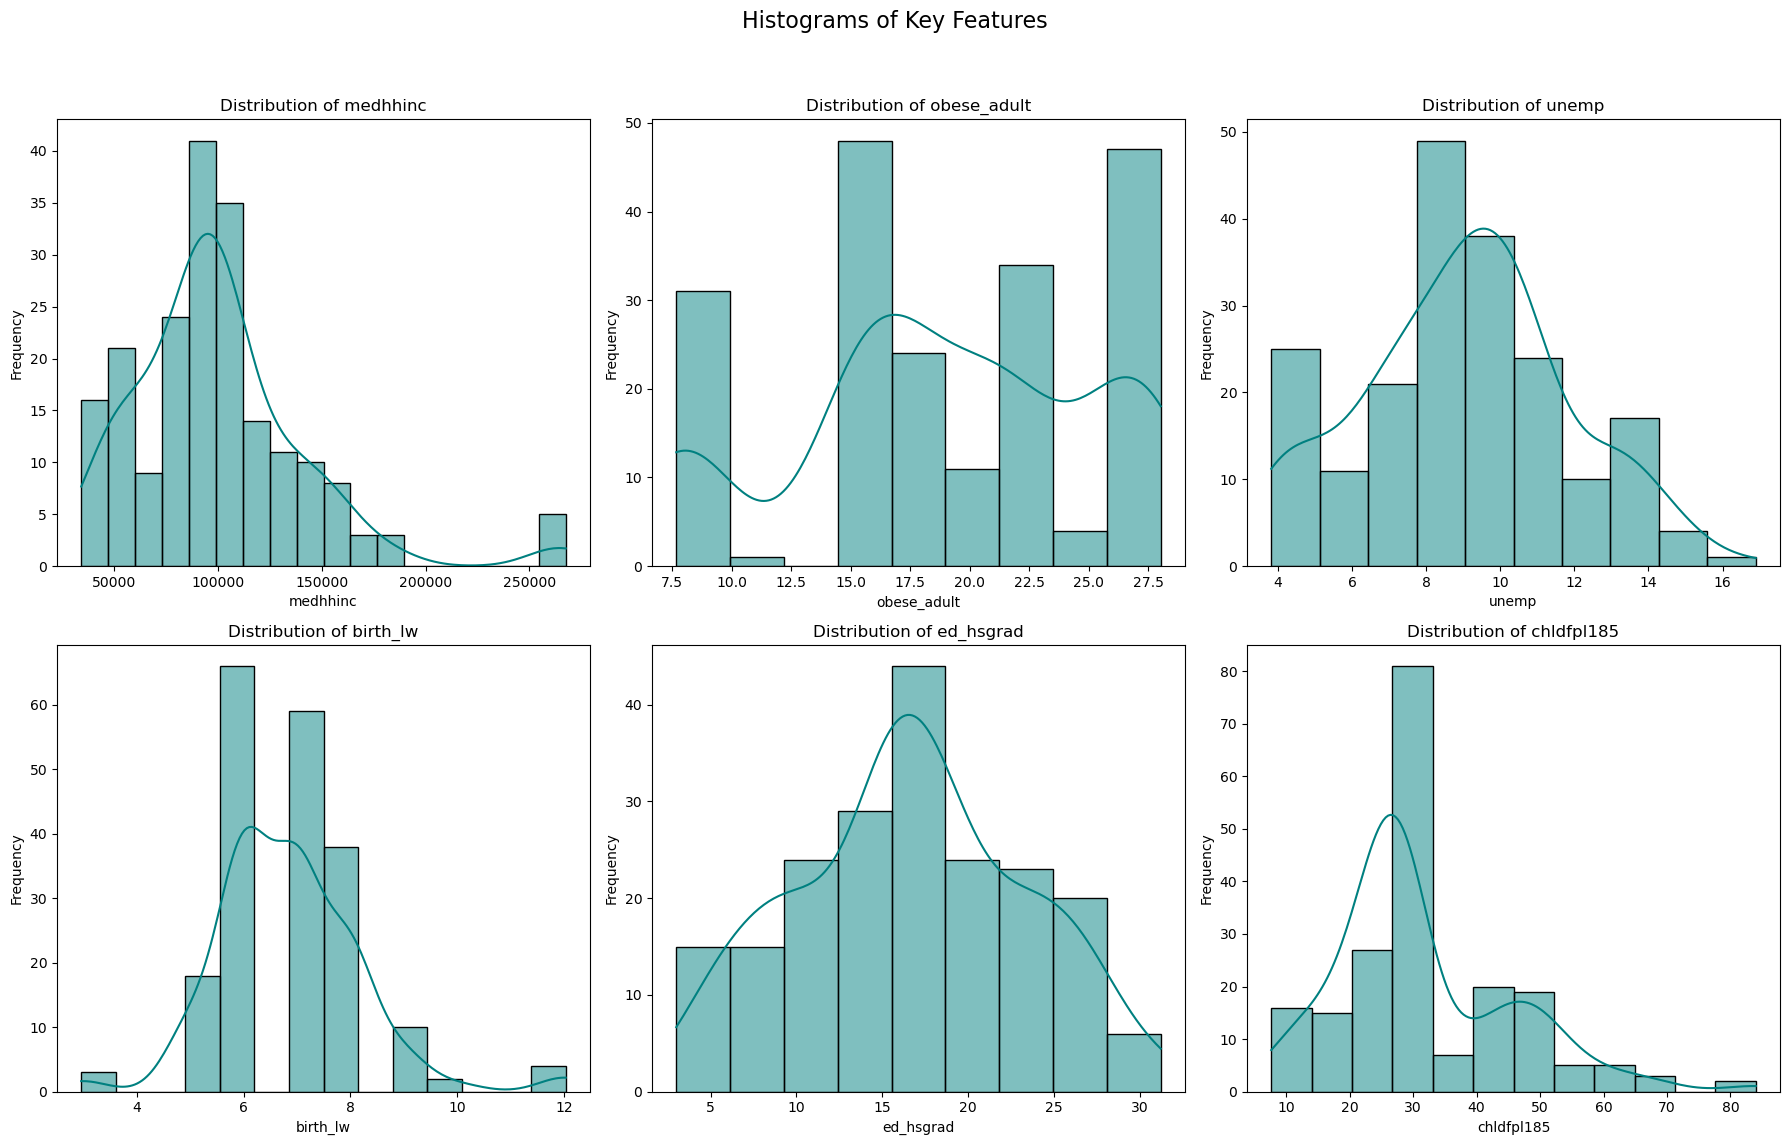

In [316]:
# Histograms in 2x3 layout
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Histograms of Key Features", fontsize=16)

hist_features = ['medhhinc', 'obese_adult', 'unemp', 'birth_lw', 'ed_hsgrad', 'chldfpl185']
for i, feature in enumerate(hist_features):
    row, col = divmod(i, 3)
    sns.histplot(neighborhood_data[feature], kde=True, color='teal', ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

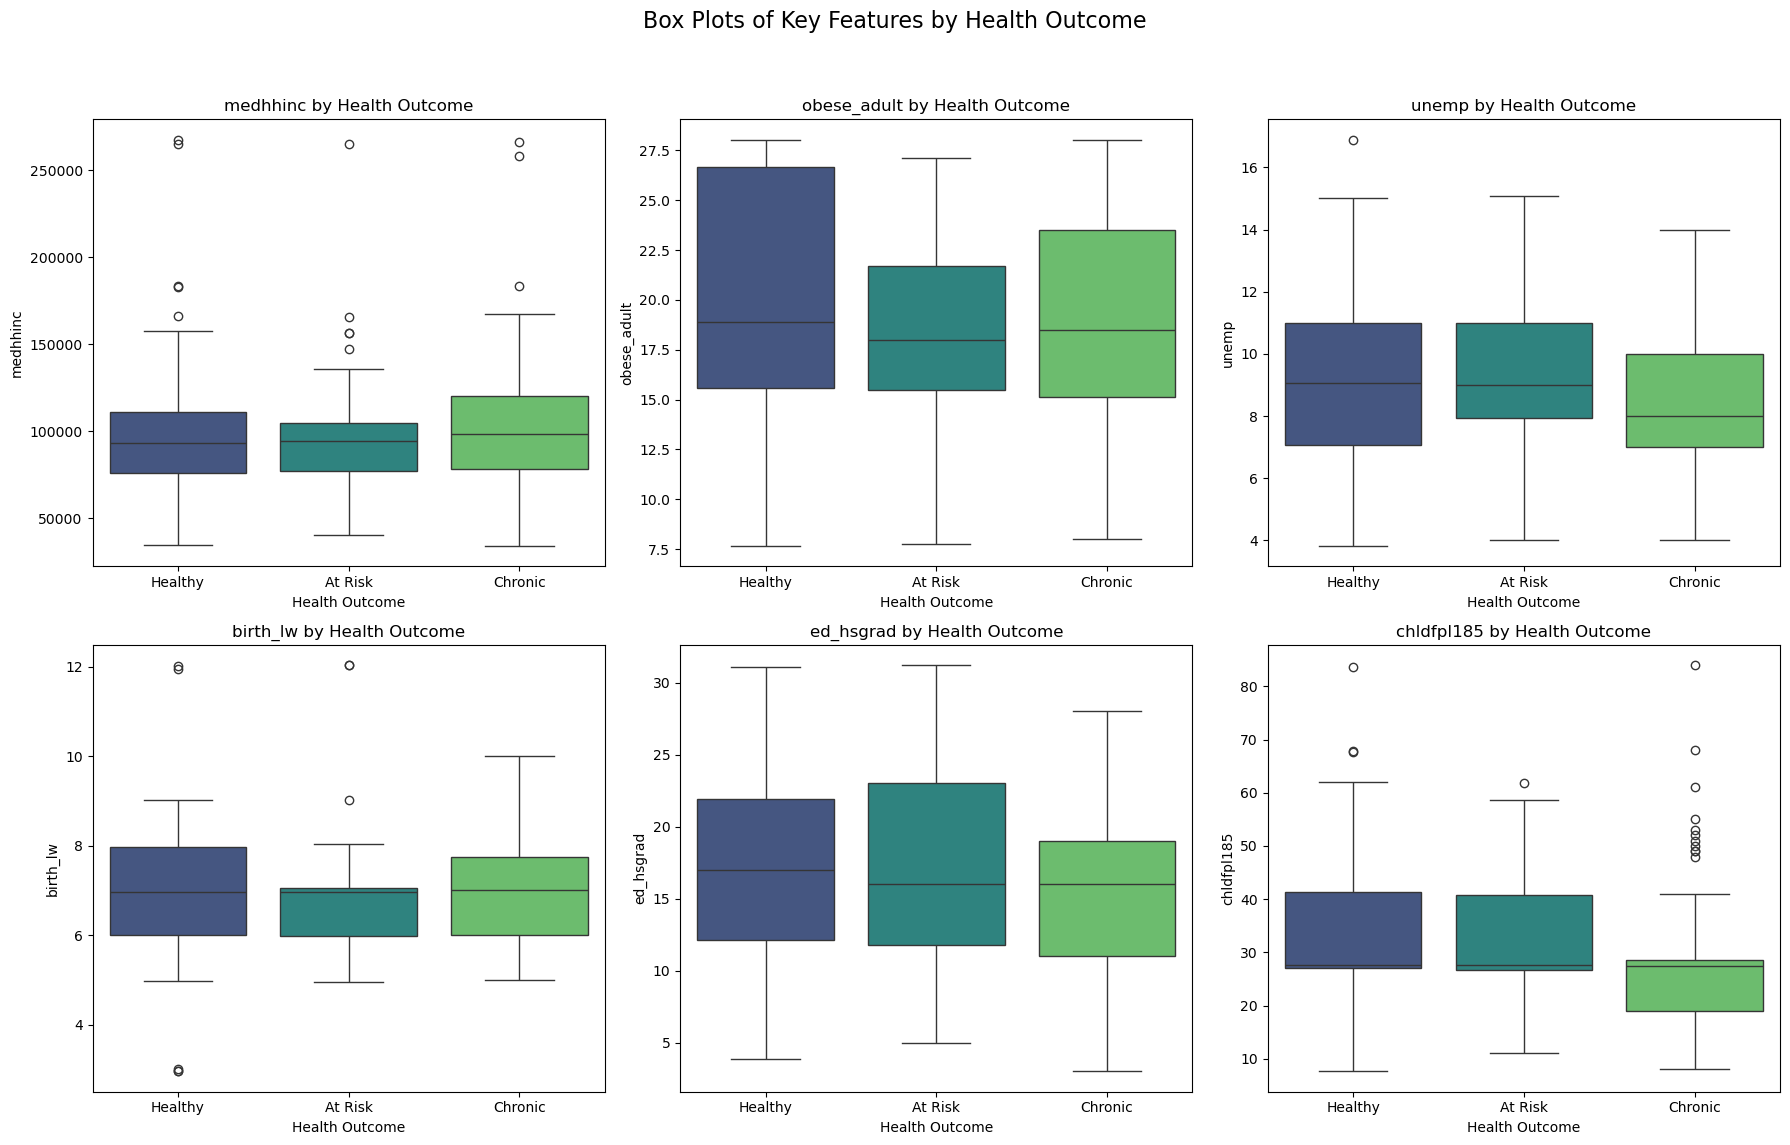

In [317]:
# Box Plots in 2x3 layout with adjusted legend handling
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle("Box Plots of Key Features by Health Outcome", fontsize=16)

box_features = ['medhhinc', 'obese_adult', 'unemp', 'birth_lw', 'ed_hsgrad', 'chldfpl185']
for i, feature in enumerate(box_features):
    row, col = divmod(i, 3)
    sns.boxplot(data=neighborhood_data, x='Health_outcome', y=feature, hue='Health_outcome', palette='viridis', ax=axes[row, col], dodge=False)
    axes[row, col].set_title(f"{feature} by Health Outcome")
    axes[row, col].set_xlabel("Health Outcome")
    axes[row, col].set_ylabel(feature)
    if axes[row, col].get_legend():
        axes[row, col].get_legend().remove()  # Remove redundant legends for each subplot

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

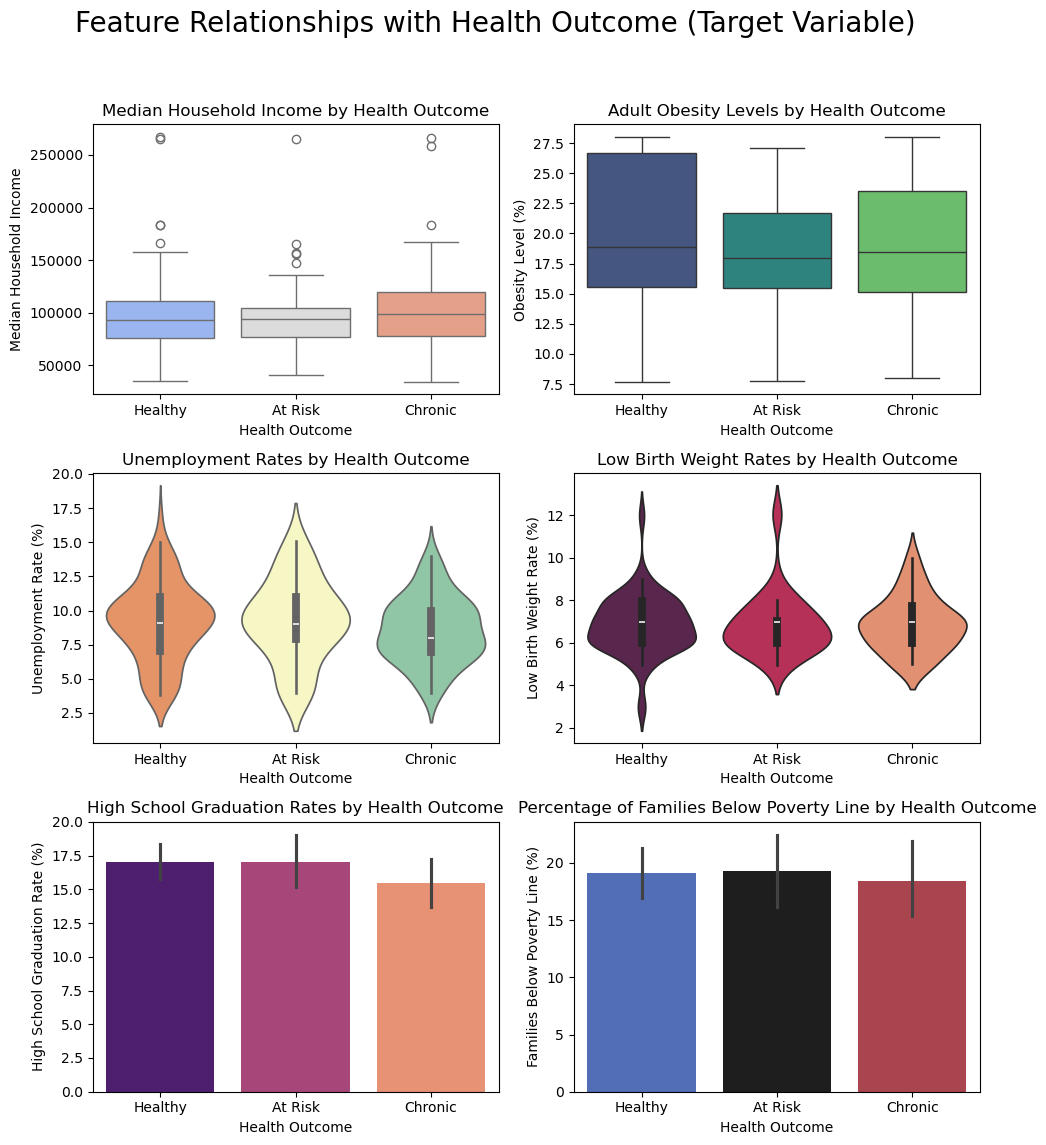

In [318]:
# Adjusted code with checks for legend existence before attempting to remove it

# Define figure and axes for box and violin plots with adjustments
fig, axes = plt.subplots(3, 2, figsize=(10, 12))
fig.suptitle("Feature Relationships with Health Outcome (Target Variable)", fontsize=20)

# Box plot for Median Household Income (medhhinc) by Health Outcome
sns.boxplot(data=neighborhood_data, x='Health_outcome', y='medhhinc', hue='Health_outcome', palette='coolwarm', ax=axes[0, 0], dodge=False)
axes[0, 0].set_title("Median Household Income by Health Outcome")
axes[0, 0].set_xlabel("Health Outcome")
axes[0, 0].set_ylabel("Median Household Income")
if axes[0, 0].get_legend():
    axes[0, 0].legend_.remove()  # Remove redundant legend if present

# Box plot for Obesity Levels (obese_adult) by Health Outcome
sns.boxplot(data=neighborhood_data, x='Health_outcome', y='obese_adult', hue='Health_outcome', palette='viridis', ax=axes[0, 1], dodge=False)
axes[0, 1].set_title("Adult Obesity Levels by Health Outcome")
axes[0, 1].set_xlabel("Health Outcome")
axes[0, 1].set_ylabel("Obesity Level (%)")
if axes[0, 1].get_legend():
    axes[0, 1].legend_.remove()  # Remove redundant legend if present

# Violin plot for Unemployment Rates by Health Outcome
sns.violinplot(data=neighborhood_data, x='Health_outcome', y='unemp', hue='Health_outcome', palette='Spectral', ax=axes[1, 0], dodge=False)
axes[1, 0].set_title("Unemployment Rates by Health Outcome")
axes[1, 0].set_xlabel("Health Outcome")
axes[1, 0].set_ylabel("Unemployment Rate (%)")
if axes[1, 0].get_legend():
    axes[1, 0].legend_.remove()  # Remove redundant legend if present

# Violin plot for Low Birth Weight Rates (birth_lw) by Health Outcome
sns.violinplot(data=neighborhood_data, x='Health_outcome', y='birth_lw', hue='Health_outcome', palette='rocket', ax=axes[1, 1], dodge=False)
axes[1, 1].set_title("Low Birth Weight Rates by Health Outcome")
axes[1, 1].set_xlabel("Health Outcome")
axes[1, 1].set_ylabel("Low Birth Weight Rate (%)")
if axes[1, 1].get_legend():
    axes[1, 1].legend_.remove()  # Remove redundant legend if present

# Bar plot for Education Level (High School Graduates) by Health Outcome
sns.barplot(data=neighborhood_data, x='Health_outcome', y='ed_hsgrad', hue='Health_outcome', palette='magma', ax=axes[2, 0], dodge=False)
axes[2, 0].set_title("High School Graduation Rates by Health Outcome")
axes[2, 0].set_xlabel("Health Outcome")
axes[2, 0].set_ylabel("High School Graduation Rate (%)")
if axes[2, 0].get_legend():
    axes[2, 0].legend_.remove()  # Remove redundant legend if present

# Bar plot for Percentage of Families Below Poverty Line (famfpl185) by Health Outcome
sns.barplot(data=neighborhood_data, x='Health_outcome', y='famfpl185', hue='Health_outcome', palette='icefire', ax=axes[2, 1], dodge=False)
axes[2, 1].set_title("Percentage of Families Below Poverty Line by Health Outcome")
axes[2, 1].set_xlabel("Health Outcome")
axes[2, 1].set_ylabel("Families Below Poverty Line (%)")
if axes[2, 1].get_legend():
    axes[2, 1].legend_.remove()  # Remove redundant legend if present

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [319]:
neighborhood_data.OBJECTID_x.nunique(),neighborhood_data.OBJECTID_y.nunique()

(200, 200)

In [321]:
neighborhood_data.drop(['OBJECTID_x','OBJECTID_y'],axis=1,inplace=True)

In [322]:
neighborhood_data.columns

Index(['medhhinc', 'unemp', 'famfpl185', 'chldfpl185', 'chld_3_4_preschl',
       'ed_lt_hs', 'ed_hsgrad', 'ed_partcoll', 'ed_collgrad', 'ed_hs', 'life',
       'cancer_mort', 'heart_mort', 'alzeihmers_mort', 'stroke_mort',
       'respiratory_mort', 'injury_mort', 'diabetes_mort', 'hyper_mort',
       'flu_pneum_mort', 'birth', 'birth_lw', 'birth_pt', 'preg_overobese',
       'preg_prenatal', 'birth_teen', 'smoker', 'obese_adult',
       'overobese_teen', 'overobese_child', 'Health_outcome'],
      dtype='object')

In [323]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [325]:
label_encoder = LabelEncoder()
neighborhood_data['Health_outcome_encoded'] = label_encoder.fit_transform(neighborhood_data['Health_outcome'])
X = neighborhood_data.drop(columns=['Health_outcome','Health_outcome_encoded'])
y = neighborhood_data['Health_outcome_encoded']

# Split the data with stratification on the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## RandomForest Classifier

In [326]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(random_state=42))])

In [327]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10]
}

# Set up GridSearchCV with the RandomForestClassifier
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [328]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [None, 10, 20, 30],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [330]:
# Output the best parameters and best score
best_params = grid_search.best_params_
best_params

{'rf__max_depth': None, 'rf__min_samples_split': 10, 'rf__n_estimators': 150}

In [331]:
best_score = grid_search.best_score_
best_score

0.6625

In [332]:
# Make predictions on the test set and generate a classification report
y_pred = grid_search.predict(X_test)

In [338]:
grid_search.best_estimator_.score(X_test,y_test)

0.675

## XgBoost Classifier

In [342]:
# Define a pipeline with StandardScaler and XGBClassifier
from xgboost import XGBClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(random_state=42,eval_metric='mlogloss'))
])

# Define hyperparameter grid for XGBClassifier
param_grid = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2],
    'xgb__subsample': [0.8, 1.0]
}

In [343]:
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X, y)

# Output best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params

Fitting 5 folds for each of 54 candidates, totalling 270 fits


{'xgb__learning_rate': 0.01,
 'xgb__max_depth': 3,
 'xgb__n_estimators': 50,
 'xgb__subsample': 0.8}

In [344]:
accuracy= grid_search.best_estimator_.score(X_test,y_test)
accuracy

0.85

In [345]:
# Generate predictions for calculating precision and recall
from sklearn.metrics import precision_score, recall_score

# Generate predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate precision and recall for each class and overall (macro or weighted average)
precision = precision_score(y_test, y_pred, average='weighted')  # Options: 'micro', 'macro', 'weighted'
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", grid_search.best_estimator_.score(X_test, y_test))
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.85
Precision: 0.8763111888111889
Recall: 0.85
